In [73]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# EDA

In [2]:
df = pd.read_csv(r'C:\Users\nezih\Repository\Projects\segmentation\segmentation_data.csv',engine = 'python')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.shape

(2000, 8)

In [5]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.drop('ID',axis = 1,inplace = True)

In [7]:
df.corr()
# Occupation,Income and Age,Education are correlated moderately.

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1, 'Correlation HeatMap')

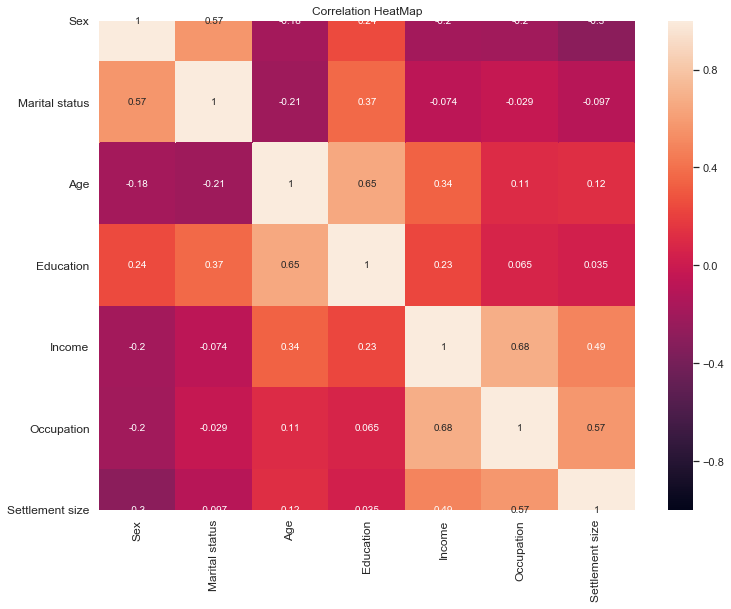

In [8]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation HeatMap')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


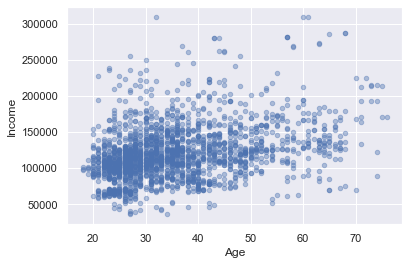

In [9]:
df.plot(kind = 'scatter',x = 'Age',y = 'Income',alpha = 0.4)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


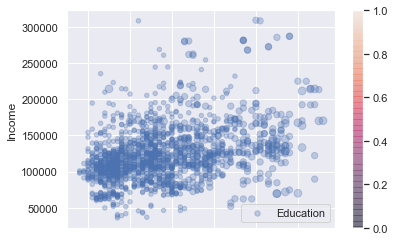

In [10]:
df.plot(kind = 'scatter',x = 'Age',y = 'Income',alpha = 0.3,
       s = df['Education']*20 ,label = 'Education',colormap = plt.get_cmap('jet'),
       colorbar = True)

In [11]:
corr_df = df.corr()
corr_df['Income'].sort_values(ascending = False)
#Income is moderately correlated with occupation of the person.

Income             1.000000
Occupation         0.680357
Settlement size    0.490881
Age                0.340610
Education          0.233459
Marital status    -0.073528
Sex               -0.195146
Name: Income, dtype: float64

In [12]:
corr_df = df.corr()
corr_df['Education'].sort_values(ascending = False)

Education          1.000000
Age                0.654605
Marital status     0.374017
Sex                0.244838
Income             0.233459
Occupation         0.064524
Settlement size    0.034732
Name: Education, dtype: float64

# Segmentation Analysis

In [13]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [14]:
wcss = [] #This is the distance between the cluster centroid and other points,the lower the better.
for i in range(1,11):#For i clusters gives the distance between their points and centroids.
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans_fit = kmeans.fit(df_std)
    wcss.append(kmeans_fit.inertia_)

Text(0.5, 1.0, 'K-Means Clustering')

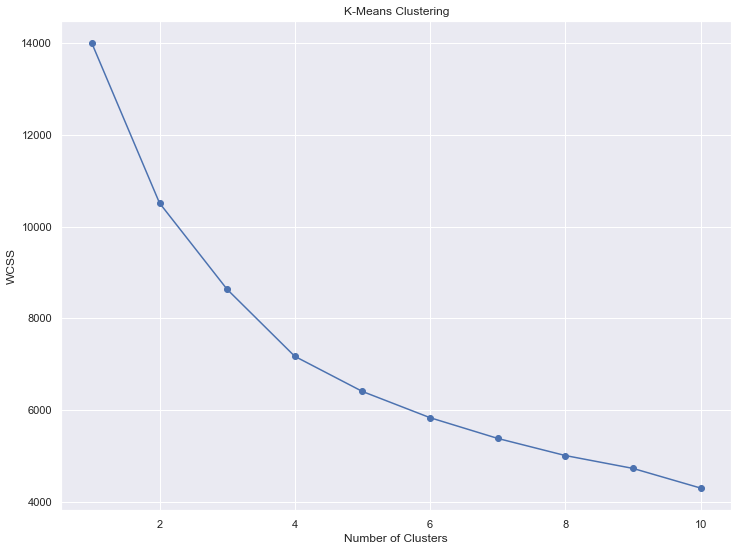

In [15]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss,marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means Clustering')
#In the graph line starts to flattening,this means after 4 clusters diminishing returns comes into play,
#added clusters have points that are farther to centroids compared to those 4 clusters.
#Concluding the cluster analysis with these clusters gives us more insights.

In [16]:
kmeans = KMeans(n_clusters = 4,random_state = 42)
kmeans.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [17]:
kmeans_segm_df = df.copy()
kmeans_segm_df['K-Means Segments'] = kmeans.labels_

In [18]:
segm_analysis = kmeans_segm_df.groupby(['K-Means Segments']).mean()
segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
K-Means Segments,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [19]:
segm_analysis.rename({0:'Well-Off',#Naming clusters based on their mean feature values.
                      1:'Fewer-Opportunities',
                      2:'Standart',
                      3:'Carrier-Focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
K-Means Segments,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
Fewer-Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
Standart,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
Carrier-Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [20]:
kmeans_segm_df['Labels'] = kmeans_segm_df['K-Means Segments'].map({0:'Well-Off',
                                                                   1:'Fewer-Opportunities',
                                                                   2:'Standart',
                                                                   3:'Career-Focused'})


In [21]:
kmeans_segm_df.drop('K-Means Segments',axis = 1,inplace = True)

In [22]:
kmeans_segm_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Labels
0,0,0,67,2,124670,1,2,Well-Off
1,1,1,22,1,150773,1,2,Standart
2,0,0,49,1,89210,0,0,Fewer-Opportunities
3,0,0,45,1,171565,1,1,Career-Focused
4,0,0,53,1,149031,1,1,Career-Focused
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,Fewer-Opportunities
1996,1,1,27,1,117744,1,0,Standart
1997,0,0,31,0,86400,0,0,Fewer-Opportunities
1998,1,1,24,1,97968,0,0,Standart


Text(0.5, 1.0, 'K-Means Segmentation')

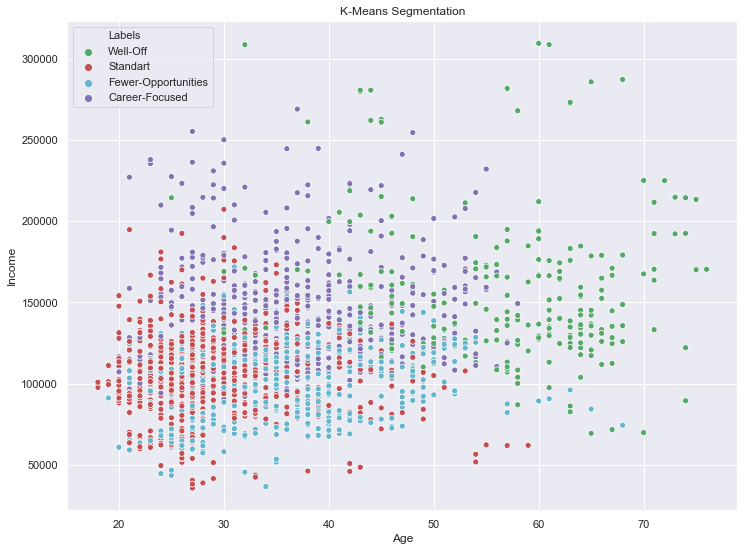

In [23]:
plt.figure(figsize = (12,9))
sns.scatterplot(kmeans_segm_df['Age'],kmeans_segm_df['Income'],hue = kmeans_segm_df['Labels'],palette = ['g', 'r', 'c', 'm'])
plt.title('K-Means Segmentation')
#4 segments represented on the income and age raw data points.
#As the age and income goes up graph points reach to well off segment,whereas when people are young but have higher income they are career focused.

# PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
exp_variance = pca.explained_variance_

Text(0, 0.5, 'Cumulative Sum Of Explained Variance')

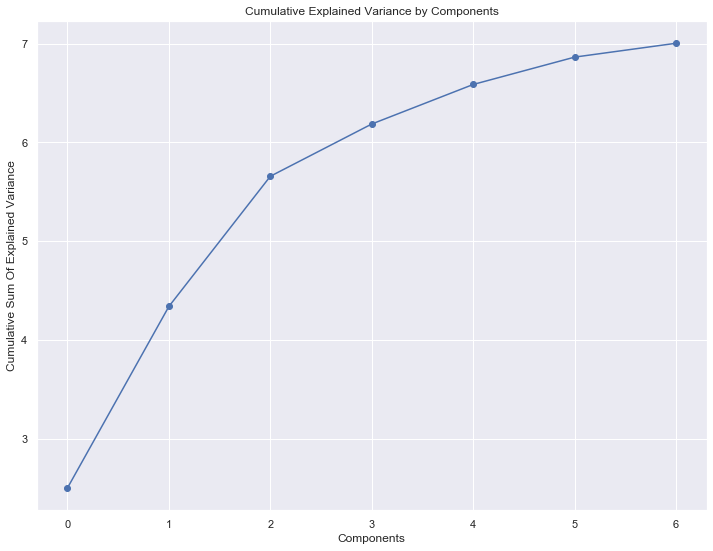

In [28]:
plt.figure(figsize = (12,9))
plt.plot(range(len(df.columns)),exp_variance.cumsum(),marker = 'o')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Components')
plt.ylabel('Cumulative Sum Of Explained Variance')

In [29]:
pca = PCA(n_components = 3)
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [31]:
pca_comp_df = pd.DataFrame(pca.components_,columns = df.columns.values,
                           index = ['Component_1','Component_2','Component_3'])
pca_comp_df
#Loadings are correlation between features and the components.
#We can get an idea of what are the prominent features in the dataset by looking at this correlation matrix,
#understand components by their correlations with features.
#Income,education and age are the most important features in these dataset according to PC analysis.

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x248872ce648>,
 <a list of 3 Text yticklabel objects>)

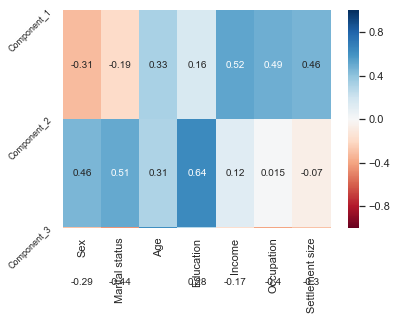

In [32]:
sns.heatmap(pca_comp_df,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component_1', 'Component_2', 'Component_3'],
           rotation = 45,
           fontsize = 9)

# K-Means with PCA

In [48]:
pca_scores = pca.fit_transform(df_std)
pca_scores

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [49]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,random_state = 42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

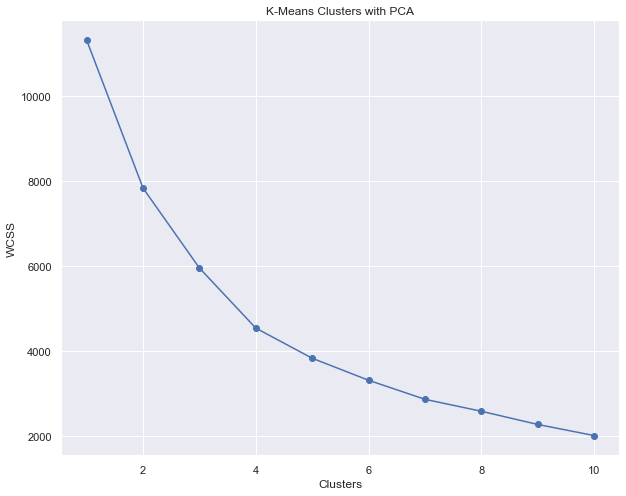

In [50]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('K-Means Clusters with PCA')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [51]:
pca_clusters = KMeans(n_clusters = 4,random_state = 42)
pca_clusters.fit(pca_scores)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [56]:
kmeans_pca_df = pd.concat([df.reset_index(drop = True),pd.DataFrame(pca_scores)],axis = 1)
kmeans_pca_df.columns.values[-3:]  = ['Component_1','Component_2','Component3']
kmeans_pca_df['K-Means PCA Segments'] = pca_clusters.labels_

In [57]:
kmeans_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_1,Component_2,Component3,K-Means PCA Segments
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [60]:
kmeans_pca_df = kmeans_pca_df.groupby(['K-Means PCA Segments']).mean()
kmeans_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_1,Component_2,Component3
K-Means PCA Segments,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [65]:
kmeans_pca_df['K-Means PCA Segments'] = kmeans_pca_df['K-Means PCA Segments'].map({0:'standard',1:'career focused',2:'fewer opportunities',3:'well-off'})

In [66]:
kmeans_pca_df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component_1,Component_2,Component3,K-Means PCA Segments
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,career focused
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,standard


Text(0.5, 1.0, 'Clusters by PCA Components')

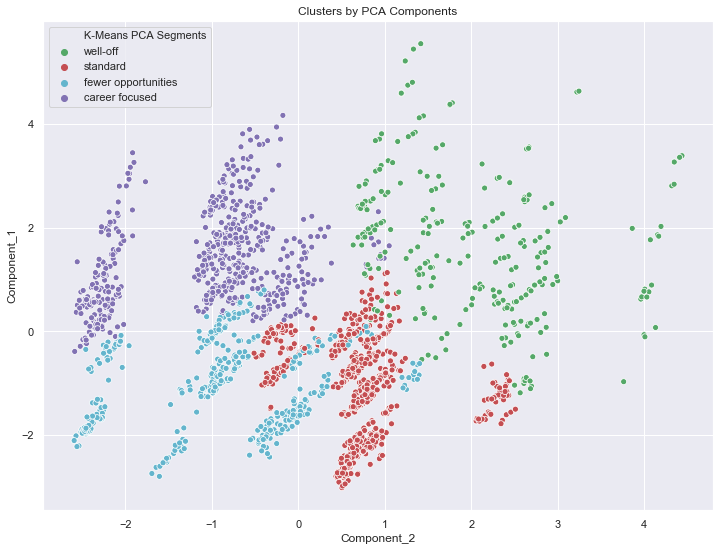

In [72]:
plt.figure(figsize = (12,9))
sns.scatterplot(kmeans_pca_df['Component_2'],kmeans_pca_df['Component_1'],hue = kmeans_pca_df['K-Means PCA Segments'],
        palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
#These are the components are correlated with Age and Income variables
#with the PC analysis this graph shows better clustering of the points than the raw ones.